<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Load-Ship-CTD-Data" data-toc-modified-id="Load-Ship-CTD-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Ship CTD Data</a></span></li><li><span><a href="#Load-Glider-Data" data-toc-modified-id="Load-Glider-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load Glider Data</a></span></li></ul></li><li><span><a href="#Plot-Temp" data-toc-modified-id="Plot-Temp-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot Temp</a></span><ul class="toc-item"><li><span><a href="#Calibrations-on-deployments" data-toc-modified-id="Calibrations-on-deployments-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Calibrations on deployments</a></span></li><li><span><a href="#Calibrations-on-retrieval" data-toc-modified-id="Calibrations-on-retrieval-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Calibrations on retrieval</a></span></li></ul></li></ul></div>

In [1]:
%pylab inline
import pandas as pd
import xarray as xr
import os, sys
sys.path.insert(0, '/Users/Marcel/Google Drive/Projects/Marcel_Py_tools/')
import agulhas_ctd
import mplots as mp
import buoyancy_glider_utils as bgu
import params
from tqdm import tqdm_notebook

Populating the interactive namespace from numpy and matplotlib


### Load Ship CTD Data

In [32]:
ctd_saz, date_saz, lon_saz, lat_saz = agulhas_ctd.read_ship_CTD('/Users/Marcel/Google Drive/Data/Agulhas_CTD_2018_19_SANAE58/SANAE 58_CTD DATA/SANAE 58_Processed/stn001/stn001.cnv')
ctd_apz, date_apz, lon_apz, lat_apz = agulhas_ctd.read_ship_CTD('/Users/Marcel/Google Drive/Data/Agulhas_CTD_2018_19_SANAE58/SANAE 58_CTD DATA/SANAE 58_Processed/stn002/stn002.cnv')
ctd_miz, date_miz, lon_miz, lat_miz = agulhas_ctd.read_ship_CTD('/Users/Marcel/Google Drive/Data/Agulhas_CTD_2018_19_SANAE58/SANAE 58_CTD DATA/SANAE 58_Processed/stn003/stn003.cnv')

### Load Glider Data

In [3]:
pathSAZ = '/Users/Marcel/Google Drive/Data/SG542_SAZ_2019/*.nc'
pathMIZ = '/Users/Marcel/Google Drive/Data/ROAM-MIZ/sg643/*.nc'

def read_sg_data(pathData):

    dat = bgu.seaglider.load_basestation_netCDF_files(pathData, verbose=True)
    
    temp = dat.temperature.data
    salt = dat.salinity.data
    
    dat = temp
    dat['salinity'] = salt.salinity
    
    return dat
    
dat_saz = read_sg_data(pathSAZ)
dat_miz = read_sg_data(pathMIZ)

pathAPZ = '/Users/Marcel/Google Drive/Data/SOSCEX-STORM-II/SOSCEx_STORM2_final_1sec.mat'
df = bgu.slocum.load_geomar_slocum_matfile(pathAPZ)
dat_apz = df.dropna(axis=0, subset=['time', 'temperature', 'latitude', 'longitude'])


        NOTE: There is a bug in the loading script at the moment.
        When you load a single variable first (e.g. `dat.temperature`)
        and then a list of variables with `load_multiple_vars` there
        may be a missmatch between coordinates for the first variable
        and the batch loaded variables. Luke still has to trace the cause
        and see if it is possible to fix this. If not, deprecate the
        single variable data access/storage
        


100%|██████████| 485/485 [00:07<00:00, 64.73it/s]


/Users/Marcel/Google Drive/Data/SG542_SAZ_2019/p5420082.nc was skipped



100%|██████████| 485/485 [00:04<00:00, 95.00it/s] 


/Users/Marcel/Google Drive/Data/SG542_SAZ_2019/p5420082.nc was skipped


        NOTE: There is a bug in the loading script at the moment.
        When you load a single variable first (e.g. `dat.temperature`)
        and then a list of variables with `load_multiple_vars` there
        may be a missmatch between coordinates for the first variable
        and the batch loaded variables. Luke still has to trace the cause
        and see if it is possible to fix this. If not, deprecate the
        single variable data access/storage
        


100%|██████████| 497/497 [00:09<00:00, 51.86it/s]


/Users/Marcel/Google Drive/Data/ROAM-MIZ/sg643/p6430039.nc was skipped



100%|██████████| 497/497 [00:05<00:00, 98.05it/s] 


/Users/Marcel/Google Drive/Data/ROAM-MIZ/sg643/p6430039.nc was skipped

Loading variables: 
	[ pressure, latitude, longitude, u, v, time_datenum, turbidity, chlorophyll, cdom, temperature, salinity,]


In [4]:
for i, val in tqdm_notebook(enumerate(unique(dat_apz.dives.values))):  
    
    ind = [dat_apz.dives.values == val]
    
    max_pres = np.nanmax(dat_apz.pressure.values[tuple(ind)])
    
    if max_pres > 200:
        
        if i == 0:
    
            t =  pd.DataFrame(dat_apz.temperature.values[tuple(ind)])
            s =  pd.DataFrame(dat_apz.salinity.values[tuple(ind)])
            p =  pd.DataFrame(dat_apz.pressure.values[tuple(ind)])
            u =  pd.DataFrame(dat_apz.u.values[tuple(ind)])
            v =  pd.DataFrame(dat_apz.v.values[tuple(ind)])
            lt = pd.DataFrame(dat_apz.latitude.values[tuple(ind)])
            ln = pd.DataFrame(dat_apz.longitude.values[tuple(ind)])
            td = pd.DataFrame(dat_apz.time_datenum.values[tuple(ind)])
            dv = pd.DataFrame(dat_apz.dives.values[tuple(ind)])
            tm = pd.DataFrame(dat_apz.time.values[tuple(ind)])
            
        if i > 0:
            
            t  = t.append(pd.DataFrame(dat_apz.temperature.values[tuple(ind)]), ignore_index=True)
            s  = s.append(pd.DataFrame(dat_apz.salinity.values[tuple(ind)]), ignore_index=True)
            p  = p.append(pd.DataFrame(dat_apz.pressure.values[tuple(ind)]), ignore_index=True)
            u  = u.append(pd.DataFrame(dat_apz.u.values[tuple(ind)]), ignore_index=True)
            v  = v.append(pd.DataFrame(dat_apz.v.values[tuple(ind)]), ignore_index=True)
            lt = lt.append(pd.DataFrame(dat_apz.latitude.values[tuple(ind)]), ignore_index=True)
            ln = ln.append(pd.DataFrame(dat_apz.longitude.values[tuple(ind)]), ignore_index=True)
            td = td.append(pd.DataFrame(dat_apz.time_datenum.values[tuple(ind)]), ignore_index=True)
            dv = dv.append(pd.DataFrame(dat_apz.dives.values[tuple(ind)]), ignore_index=True)
            tm = tm.append(pd.DataFrame(dat_apz.time.values[tuple(ind)]), ignore_index=True)
            
dat_apz = t
dat_apz = dat_apz.rename(columns={0: "temperature"})
dat_apz = dat_apz.set_index(tm.values.squeeze())

dat_apz['salinity'] = s.values.squeeze()
dat_apz['pressure'] = p.values.squeeze()
dat_apz['u'] = u.values.squeeze()
dat_apz['v'] = v.values.squeeze()
dat_apz['latitude'] = lt.values.squeeze()
dat_apz['longitude'] = ln.values.squeeze()
dat_apz['time_datenum'] = td.values.squeeze()
dat_apz['dives'] = dv.values.squeeze()
dat_apz['time'] = tm.values.squeeze()

### Calibrations on deployments

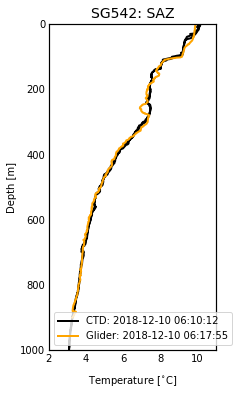

In [33]:
mp.plot_profile(ctd_saz['Temperature'], ctd_saz['Pressure[db]'], x_lim=[2, 11], 
                label='CTD: '+str(date_saz), lw=2, grid=False)

dive_mask = dat_saz['dives']==1

dive_date = pd.to_datetime(dat_saz['ctd_time'][dive_mask].values[0])

plot(dat_saz['temperature'][dive_mask], dat_saz['ctd_depth'][dive_mask], c='orange', lw=2,
    label='Glider: '+ str(dive_date))

lg=legend(fontsize=10)

title('SG542: SAZ', fontsize=14)
xlabel('Temperature [$^{\circ}$C]', labelpad=10)
ylabel('Depth [m]', labelpad=3)

savefig('/Users/Marcel/Google Drive/Projects/ROAM_MIZ/CTD_Calibrations/SAZ_deploy_T.png', dpi=300, bbox_inches="tight")

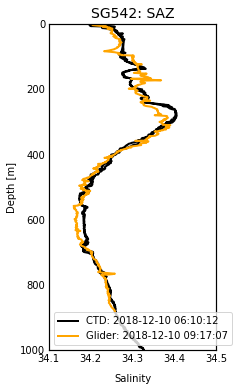

In [34]:
mp.plot_profile(ctd_saz['Salinity'], ctd_saz['Pressure[db]'], x_lim=[34.1, 34.5], 
                label='CTD: '+str(date_saz), lw=2, grid=False)

dive_mask = dat_saz['dives']==1.5

dive_date = pd.to_datetime(dat_saz['ctd_time'][dive_mask].values[0])

plot(dat_saz['salinity'][dive_mask], dat_saz['ctd_depth'][dive_mask], c='orange', lw=2,
    label='Glider: '+ str(dive_date))

lg=legend(fontsize=10, loc=3)

title('SG542: SAZ', fontsize=14)
xlabel('Salinity', labelpad=10)
ylabel('Depth [m]', labelpad=3)

savefig('/Users/Marcel/Google Drive/Projects/ROAM_MIZ/CTD_Calibrations/SAZ_deploy_S.png', dpi=300, bbox_inches="tight")

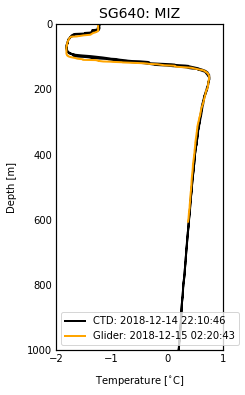

In [35]:
mp.plot_profile(ctd_miz['Temperature'], ctd_miz['Pressure[db]'], x_lim=[-2, 1], 
                label='CTD: '+str(date_miz), lw=2, grid=False)

dive_mask = dat_miz['dives']==4

dive_date = pd.to_datetime(dat_miz['ctd_time'][dive_mask].values[0])

plot(dat_miz['temperature'][dive_mask], dat_miz['ctd_depth'][dive_mask], c='orange', lw=2,
    label='Glider: '+ str(dive_date))

lg=legend(fontsize=10)

title('SG640: MIZ', fontsize=14)
xlabel('Temperature [$^{\circ}$C]', labelpad=10)
ylabel('Depth [m]', labelpad=10)

savefig('/Users/Marcel/Google Drive/Projects/ROAM_MIZ/CTD_Calibrations/MIZ_deploy_T.png', dpi=300, bbox_inches="tight")


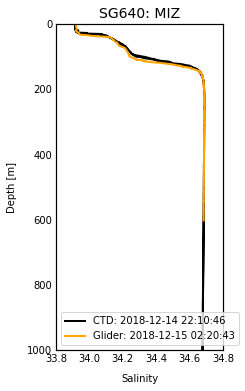

In [36]:
mp.plot_profile(ctd_miz['Salinity'], ctd_miz['Pressure[db]'], x_lim=[33.8, 34.8], 
                label='CTD: '+str(date_miz), lw=2, grid=False)

dive_mask = dat_miz['dives']==4

dive_date = pd.to_datetime(dat_miz['ctd_time'][dive_mask].values[0])

plot(dat_miz['salinity'][dive_mask], dat_miz['ctd_depth'][dive_mask], c='orange', lw=2,
    label='Glider: '+ str(dive_date))

lg=legend(fontsize=10)

title('SG640: MIZ', fontsize=14)
xlabel('Salinity', labelpad=10)
ylabel('Depth [m]', labelpad=10)

savefig('/Users/Marcel/Google Drive/Projects/ROAM_MIZ/CTD_Calibrations/MIZ_deploy_S.png', dpi=300, bbox_inches="tight")


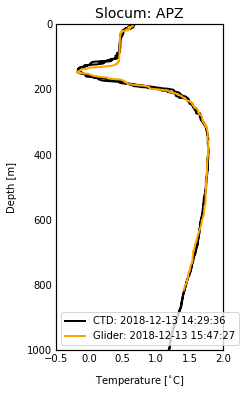

In [37]:
mp.plot_profile(ctd_apz['Temperature'], ctd_apz['Pressure[db]'], x_lim=[-.5, 2], 
                label='CTD: '+str(date_apz), lw=2, grid=False)

dive_mask = dat_apz['dives']==0

dive_date = pd.to_datetime(dat_apz['time'][dive_mask].values[0])

plot(dat_apz['temperature'][dive_mask], dat_apz['pressure'][dive_mask], c='orange', lw=2,
    label='Glider: '+ str(dive_date))

lg=legend(fontsize=10)

title('Slocum: APZ', fontsize=14)
xlabel('Temperature [$^{\circ}$C]', labelpad=10)
ylabel('Depth [m]', labelpad=10)

savefig('/Users/Marcel/Google Drive/Projects/ROAM_MIZ/CTD_Calibrations/APZ_deploy_T.png', dpi=300, bbox_inches="tight")

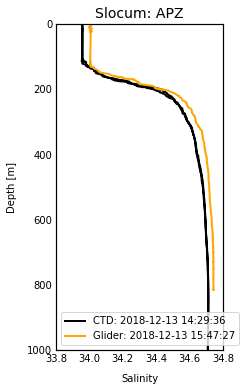

In [38]:
mp.plot_profile(ctd_apz['Salinity'], ctd_apz['Pressure[db]'], x_lim=[33.8, 34.8], 
                label='CTD: '+str(date_apz), lw=2, grid=False)

dive_mask = dat_apz['dives']==0

dive_date = pd.to_datetime(dat_apz['time'][dive_mask].values[0])

plot(dat_apz['salinity'][dive_mask], dat_apz['pressure'][dive_mask], c='orange', lw=2,
    label='Glider: '+ str(dive_date))

lg=legend(fontsize=10)

title('Slocum: APZ', fontsize=14)
xlabel('Salinity', labelpad=10)
ylabel('Depth [m]', labelpad=10)

savefig('/Users/Marcel/Google Drive/Projects/ROAM_MIZ/CTD_Calibrations/APZ_deploy_S.png', dpi=300, bbox_inches="tight")

### Calibrations on retrieval

In [39]:
ctd_miz, date_miz, lon_miz, lat_miz = agulhas_ctd.read_ship_CTD('/Users/Marcel/Google Drive/Data/Agulhas_CTD_2018_19_SANAE58/SANAE 58_CTD DATA/SANAE 58_Processed/stn036/stn036.cnv')
ctd_saz, date_saz, lon_saz, lat_saz = agulhas_ctd.read_ship_CTD('/Users/Marcel/Google Drive/Data/Agulhas_CTD_2018_19_SANAE58/SANAE 58_CTD DATA/SANAE 58_Processed/stn037/stn037.cnv')

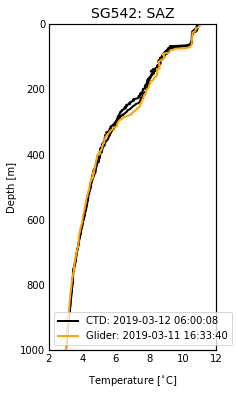

In [40]:
mp.plot_profile(ctd_saz['Temperature'], ctd_saz['Pressure[db]'], x_lim=[2, 12], 
                label='CTD: '+str(date_saz), lw=2, grid=False)

dive_mask = dat_saz['dives']==478

dive_date = pd.to_datetime(dat_saz['ctd_time'][dive_mask].values[0])

plot(dat_saz['temperature'][dive_mask], dat_saz['ctd_depth'][dive_mask], c='orange', lw=2,
    label='Glider: '+ str(dive_date))

lg=legend(fontsize=10, loc=3)

title('SG542: SAZ', fontsize=14)
xlabel('Temperature [$^{\circ}$C]', labelpad=10)
ylabel('Depth [m]', labelpad=3)

savefig('/Users/Marcel/Google Drive/Projects/ROAM_MIZ/CTD_Calibrations/SAZ_retrieve_T.png', dpi=300, bbox_inches="tight")


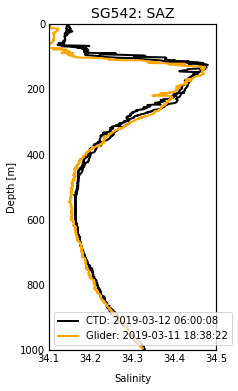

In [41]:
mp.plot_profile(ctd_saz['Salinity'], ctd_saz['Pressure[db]'], x_lim=[34.1, 34.5], 
                label='CTD: '+str(date_saz), lw=2, grid=False)

dive_mask = dat_saz['dives']==478.5

dive_date = pd.to_datetime(dat_saz['ctd_time'][dive_mask].values[0])

plot(dat_saz['salinity'][dive_mask], dat_saz['ctd_depth'][dive_mask], c='orange', lw=2,
    label='Glider: '+ str(dive_date))

lg=legend(fontsize=10, loc=3)

title('SG542: SAZ', fontsize=14)
xlabel('Salinity', labelpad=10)
ylabel('Depth [m]', labelpad=3)

savefig('/Users/Marcel/Google Drive/Projects/ROAM_MIZ/CTD_Calibrations/SAZ_retrieve_S.png', dpi=300, bbox_inches="tight")


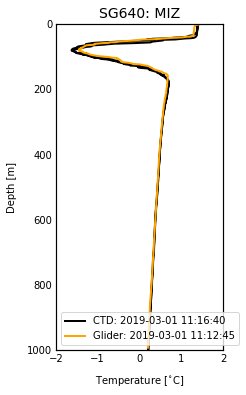

In [42]:
mp.plot_profile(ctd_miz['Temperature'], ctd_miz['Pressure[db]'], x_lim=[-2, 2], 
                label='CTD: '+str(date_miz), lw=2, grid=False)

dive_mask = dat_miz['dives']==384

dive_date = pd.to_datetime(dat_miz['ctd_time'][dive_mask].values[0])

plot(dat_miz['temperature'][dive_mask], dat_miz['ctd_depth'][dive_mask], c='orange', lw=2,
    label='Glider: '+ str(dive_date))

lg=legend(fontsize=10, loc=3)

title('SG640: MIZ', fontsize=14)
xlabel('Temperature [$^{\circ}$C]', labelpad=10)
ylabel('Depth [m]', labelpad=10)

savefig('/Users/Marcel/Google Drive/Projects/ROAM_MIZ/CTD_Calibrations/MIZ_retrieve_T.png', dpi=300, bbox_inches="tight")


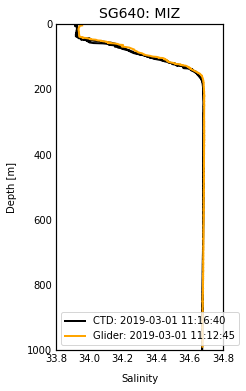

In [43]:
mp.plot_profile(ctd_miz['Salinity'], ctd_miz['Pressure[db]'], x_lim=[33.8, 34.8], 
                label='CTD: '+str(date_miz), lw=2, grid=False)

dive_mask = dat_miz['dives']==384

dive_date = pd.to_datetime(dat_miz['ctd_time'][dive_mask].values[0])

plot(dat_miz['salinity'][dive_mask], dat_miz['ctd_depth'][dive_mask], c='orange', lw=2,
    label='Glider: '+ str(dive_date))

lg=legend(fontsize=10, loc=3)

title('SG640: MIZ', fontsize=14)
xlabel('Salinity', labelpad=10)
ylabel('Depth [m]', labelpad=10)

savefig('/Users/Marcel/Google Drive/Projects/ROAM_MIZ/CTD_Calibrations/MIZ_retrieve_S.png', dpi=300, bbox_inches="tight")
